# Homework #2
Please turn this homework in using a GitHub pull request comment to your TA. You will want to start with a new branch (independent of your lab branches).



1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

When rolling 2 six-sided dice, there is only one way to get snake eyes by rolling 1 for both dice (the probability is $ \frac{1}{36}$).
And there are more ways to roll sevens, we can get 7 by rolling 1 and 6, 2 and 5, 3 and 4, 4 and 3, 5 and 2, 6 and 1. the probability to roll 7 is $\frac{6}{36}=\frac{1}{6}$.
The ratio of the probabilities is 1:6

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

Analytically (math & counting):
To find the probability of the sum of 2 six sided dice, we can use the equation 
$$P_{A+B}(x)=\sum P_{z}(z)P_{z}(x-z) $$
For example:
the probability of rolling a 1 on one six sided dice is $\frac{1}{6}$ so the probability of the dices sum to 2 is $\frac{1}{6}*\frac{1}{6}=\frac{1}{36}$
The probability of rolling the sum of 3 is the probability of getting a 1 on the first dice and a 2 on the second dice plus the probability of getting a 2 on the first dice and a 1 on the second dice. $\frac{1}{6}*\frac{1}{6}+\frac{1}{6}*\frac{1}{6}=\frac{2}{36}$
by doing it, we will get the density function:
$$P_2=\frac{1}{36},P_3=\frac{2}{36},P_4=\frac{3}{36},P_5=\frac{4}{36},P_6=\frac{5}{36},P_7=\frac{6}{36},P_8=\frac{5}{36},P_9=\frac{4}{36},P_{10}=\frac{3}{36},P_{11}=\frac{2}{36},P_{12}=\frac{1}{36}$$


Plot using data:

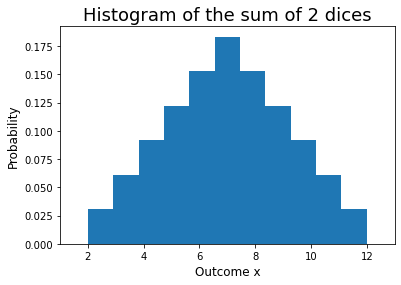

In [71]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import signal

d = np.array([2,3,3,4,4,4,5,5,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,9,9,10,10,10,11,11,12])
ax=plt.hist(d,density=True,bins=11)
plt.xlim([1,13])
plt.xlabel('Outcome x', size=12)
plt.ylabel('Probability', size=12)
plt.title('Histogram of the sum of 2 dices', size=18)
plt.show()

Numerically (computer program): we can use fftconvolve() to make the convolution

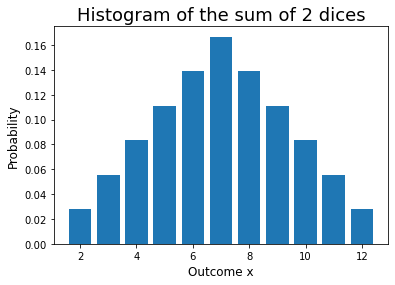

In [72]:
probs =[1/6,1/6,1/6,1/6,1/6,1/6]
sums = scipy.signal.fftconvolve(probs,probs); 
x=np.array([1,2,3,4,5,6]);
n=2;
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x1=np.arange(xmin,xmax+1)
ax=plt.bar(x1,sums);
plt.xlabel('Outcome x', size=12)
plt.ylabel('Probability', size=12)
plt.title('Histogram of the sum of 2 dices', size=18)
plt.show()

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [73]:
mean=0
for i in range(len(x1)):
    mean=mean+x1[i]*sums[i]
print('the mean is',mean)


the mean is 7.0


In [74]:
var=0
for i in range(len(x1)):
    var=var+((x1[i]-mean)**2)*sums[i]
print('the variance is ',var)

the variance is  5.833333333333334


4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

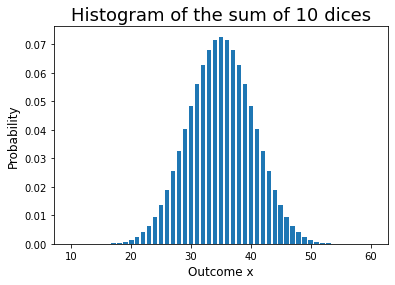

In [75]:
prob =[1/6,1/6,1/6,1/6,1/6,1/6]
sums2 = scipy.signal.fftconvolve(prob,prob); 
sums4 = scipy.signal.fftconvolve(sums2,sums2); 
sums8= scipy.signal.fftconvolve(sums4,sums4);
sums10=scipy.signal.fftconvolve(sums8,sums2);
x=np.array([1,2,3,4,5,6]);
n=10
xmin=x[0]*n;
xmax=x[len(x)-1]*n
x1=np.arange(xmin,xmax+1)
ax=plt.bar(x1,sums10)
plt.xlabel('Outcome x', size=12)
plt.ylabel('Probability', size=12)
plt.title('Histogram of the sum of 10 dices', size=18)
plt.show()

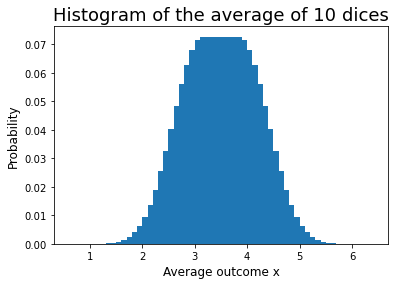

In [76]:
avg=x1/n;
ax=plt.bar(avg,sums10)
plt.xlabel('Average outcome x', size=12)
plt.ylabel('Probability', size=12)
plt.title('Histogram of the average of 10 dices', size=18)
plt.show()

This is a Gaussian Distribution because its symmetric around the mean and has a bell curve. By looking at the plot we see that the mean, the mode and the median are equal. Moreover, when I changed y-axis into logscale, the plot follows a parabolic curve, which mean it is a Gaussian distribution.

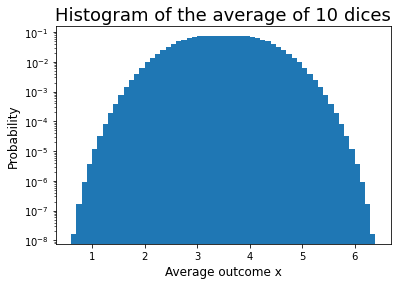

In [77]:
avg=x1/n;
ax=plt.bar(avg,sums10)
plt.xlabel('Average outcome x', size=12)
plt.ylabel('Probability', size=12)
plt.title('Histogram of the average of 10 dices', size=18)
plt.yscale('log')
plt.show()

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

The Gaussian distribution function is:
$$f(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{{\left(x-\mu 
\right)}^2 }{2\sigma^2 }}$$

If we add more of this function with different $\sigma$ and $\mu$ or average them, we will still have the same form of the function above. Which mean we will still have the Gaussian distribution. 
When we sum the Gaussian distribution, it streched the distribution(the range for x-axis increase), so the standard deviation increases. When we average the multiple Gaussian distribution, it shrinked the distribution (the x-axis still have the same range, but there're now more possible outcome in between), so the standard deviation decreases. 
If we integrate a signal over time, the standard deviation will increase